In [1]:
pip install pydicom

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Ici les DATAFRAMES (fichier csv)

In [3]:
import os, sys
import pydicom as dcm
import pandas as pd
import matplotlib.pyplot as plt #graphiques
from os import listdir
from os.path import isfile, join
#onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
import glob
#len(glob.glob(join(mypath,"*","*","MR*"),recursive=True))

In [4]:
PATH_DIR = join('/NAS','dumbo','protocoles','HAMSI')

In [5]:
ma_table = pd.read_csv(join(PATH_DIR,"HAMSI_full_info_new.csv"),sep=';')

In [6]:
mypath = join('/NAS','dumbo','protocoles','HAMSI','data')

In [7]:
#Permer de créer le LUT NbPat <-> IPP CHU <-> UID

#cols=['PatientID','StudyInstanceUID']
#pd.drop_duplicates(ma_table[cols])

#uniqueValues = (ma_table['PatientID'].append(ma_table['StudyInstanceUID'])).unique()
#print(uniqueValues)

LUT = pd.read_csv(join(PATH_DIR,"LUT_HAMSI.csv"),sep=',',dtype=str)
for ind in LUT.index:    
    IPPCHU=str(LUT.loc[ind,'IPP_CHU'])
    STRQUERY='PatientID=='+IPPCHU
    #print(IPPCHU,pd.unique(ma_table.query(STRQUERY)['StudyInstanceUID']))
    if pd.unique(ma_table.query(STRQUERY)['StudyInstanceUID']).shape[0]>0 :
        LUT.loc[ind,'UID1']=pd.unique(ma_table.query(STRQUERY)['StudyInstanceUID'])[0]
    if pd.unique(ma_table.query(STRQUERY)['StudyInstanceUID']).shape[0]>1 :
        LUT.loc[ind,'UID2']=pd.unique(ma_table.query(STRQUERY)['StudyInstanceUID'])[1]
print(LUT)   
LUT.to_csv(join(PATH_DIR,"LUT_HAMSI_complet.csv"),sep=',') 

    NBREDCAP    IPP_CHU                                       UID1 UID2
0          1  102319419  1.3.51.0.1.1.10.49.10.222.5838452.5838738  NaN
1          2  102668125                                        NaN  NaN
2          3  100111923                                        NaN  NaN
3          4     673896  1.3.51.0.1.1.10.49.10.222.5898333.5898631  NaN
4          5  102932266  1.3.51.0.1.1.10.49.10.222.5929570.5929882  NaN
..       ...        ...                                        ...  ...
184      185  500153388  1.3.51.0.1.1.10.49.10.222.7167748.7168806  NaN
185      186  103169836  1.3.51.0.1.1.10.49.10.222.7317579.7318700  NaN
186      187     717806  1.3.51.0.1.1.10.49.10.222.7330786.7331919  NaN
187      188  102962624  1.3.51.0.1.1.10.49.10.222.7342136.7343281  NaN
188      189  500178568  1.3.51.0.1.1.10.49.10.222.7400527.7401684  NaN

[189 rows x 4 columns]


In [8]:
PTOnGE = pd.read_csv(join(PATH_DIR,"df_table_T1Gado_GE.csv"),sep=',',dtype=str)
for file in glob.glob('/NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/COL_SIEMENS/Pat*.nii.gz'):
    if not os.path.exists(file.replace('COL_SIEMENS','CHU_GE')):
        print(file.replace('COL_SIEMENS','CHU_GE'))

/NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/CHU_GE/Pat101.nii.gz
/NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/CHU_GE/Pat102.nii.gz
/NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/CHU_GE/Pat103.nii.gz
/NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/CHU_GE/Pat10.nii.gz
/NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/CHU_GE/Pat112.nii.gz
/NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/CHU_GE/Pat113.nii.gz
/NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/CHU_GE/Pat114.nii.gz
/NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/CHU_GE/Pat116.nii.gz
/NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/CHU_GE/Pat117.nii.gz
/NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/CHU_GE/Pat11.nii.gz
/NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/CHU_GE/Pat124.nii.gz
/NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/CHU_GE/Pat126.nii.gz
/NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/CHU_GE/Pat128.nii.gz
/NAS/dumbo/protocoles/HAMSI/OurData4Mispel_T1Gado/CHU_GE/Pat129.nii.gz
/NAS/dum

# Infos dataframe

In [5]:
resultat = ma_table.groupby('PatientSex')['PatientID'].nunique()
print(resultat)

PatientSex
F     91
M    112
Name: PatientID, dtype: int64


In [61]:
ma_table['PatientID']= ma_table['PatientID'].astype(str)

In [59]:
ma_table.head()

,PatientID,PatientName,PatientBirthDate,PatientSex,AccessionNumber,Modality,StudyDescription,StudyDate,StudyTime,StudyInstanceUID,SeriesDescription,SeriesTime,SeriesNumber,Slices,SerieInstanceUID,/NAS/dumbo/protocoles/HAMSI/data//StudyInstanceUID/SerieInstanceUID,Machine,Manufacturer Model Name,Station Name
10,500142255,ABDOU^AHMED^^^,19680811,M,7036063,MROT,IRM CEREBRALE +,20211202,1433,1.3.51.0.1.1.10.49.10.222.7036063.7037033,Sag CUBE T1,1434,3,272,1.2.840.113619.2.374.2807.1582298.15832.163818...,/NAS/dumbo/protocoles/HAMSI/data//1.3.51.0.1.1...,GE MEDICAL SYSTEMS,Optima MR450w,MR02
11,500142255,ABDOU^AHMED^^^,19680811,M,7036063,MROT,IRM CEREBRALE +,20211202,1433,1.3.51.0.1.1.10.49.10.222.7036063.7037033,Ax Diffusion b1000,1438,4,46,1.2.840.113619.2.374.2807.1582298.15832.163818...,/NAS/dumbo/protocoles/HAMSI/data//1.3.51.0.1.1...,GE MEDICAL SYSTEMS,Optima MR450w,MR02
12,500142255,ABDOU^AHMED^^^,19680811,M,7036063,MROT,IRM CEREBRALE +,20211202,1433,1.3.51.0.1.1.10.49.10.222.7036063.7037033,Ax T2* GRE FFE,1440,5,23,1.2.840.113619.2.374.2807.1582298.15832.163818...,/NAS/dumbo/protocoles/HAMSI/data//1.3.51.0.1.1...,GE MEDICAL SYSTEMS,Optima MR450w,MR02
13,500142255,ABDOU^AHMED^^^,19680811,M,7036063,MROT,IRM CEREBRALE +,20211202,1433,1.3.51.0.1.1.10.49.10.222.7036063.7037033,Sag CUBE T2 FLAIR FS,1442,6,208,1.2.840.113619.2.374.2807.1582298.15832.163818...,/NAS/dumbo/protocoles/HAMSI/data//1.3.51.0.1.1...,GE MEDICAL SYSTEMS,Optima MR450w,MR02
14,500142255,ABDOU^AHMED^^^,19680811,M,7036063,MROT,IRM CEREBRALE +,20211202,1433,1.3.51.0.1.1.10.49.10.222.7036063.7037033,Sag CUBE T1 Gado,1447,7,272,1.2.840.113619.2.374.2807.1582298.15832.163818...,/NAS/dumbo/protocoles/HAMSI/data//1.3.51.0.1.1...,GE MEDICAL SYSTEMS,Optima MR450w,MR02


## Liste des études pour lesquelles le COL n'a pas les images 

In [73]:
liste_absents_COL = ['1.3.51.0.1.1.10.49.10.222.6146603.6147072', '1.3.51.0.1.1.10.49.10.222.6388844.6389400', '1.3.51.0.1.1.10.49.10.222.6647658.6648386',
                '1.3.51.0.1.1.10.49.10.222.6585523.6586221', '1.3.51.0.1.1.10.49.10.222.6622762.6623471', '1.3.51.0.1.1.10.49.10.222.6906538.6907449',
                '1.3.51.0.1.1.10.49.10.222.6906161.6907072', '1.3.51.0.1.1.10.49.10.222.7439732.7440916', '1.3.51.0.1.1.10.49.10.222.7477184.7478383']

In [189]:
# Etudes sans T1
liste_table = []
for x in ma_table['StudyInstanceUID'] : 
    liste_table.append(x)

liste_table_T1 = []
for x in df_table_T1['StudyInstanceUID']:
    liste_table_T1.append(x)

for e in liste_table : 
    if e not in liste_table_T1 :
        print(e)
    
    # Séries : Sag FSPGR 3D 1mm iso -> biopsie 

1.3.51.0.1.1.10.49.10.222.6970136.6971075
1.3.51.0.1.1.10.49.10.222.6970136.6971075
1.3.51.0.1.1.10.49.10.222.6970136.6971075
1.3.51.0.1.1.10.49.10.222.6970136.6971075
1.3.51.0.1.1.10.49.10.222.6585523.6586221
1.3.51.0.1.1.10.49.10.222.6585523.6586221
1.3.51.0.1.1.10.49.10.222.6585523.6586221
1.3.51.0.1.1.10.49.10.222.6585523.6586221
1.3.51.0.1.1.10.49.10.222.6585523.6586221
1.3.51.0.1.1.10.49.10.222.6242070.6242583
1.3.51.0.1.1.10.49.10.222.6242070.6242583
1.3.51.0.1.1.10.49.10.222.6242070.6242583
1.3.51.0.1.1.10.49.10.222.7000684.7001638
1.3.51.0.1.1.10.49.10.222.7000684.7001638
1.3.51.0.1.1.10.49.10.222.7000684.7001638
1.3.51.0.1.1.10.49.10.222.7000684.7001638
1.3.51.0.1.1.10.49.10.222.6253388.6253904
1.3.51.0.1.1.10.49.10.222.6253388.6253904
1.3.51.0.1.1.10.49.10.222.6253388.6253904
1.3.51.0.1.1.10.49.10.222.6095139.6095571
1.3.51.0.1.1.10.49.10.222.6095139.6095571
1.3.51.0.1.1.10.49.10.222.6095139.6095571
1.3.51.0.1.1.10.49.10.222.6095139.6095571
1.3.51.0.1.1.10.49.10.222.7097382.

# Suppression des lignes inutiles 

In [43]:
for x in ma_table.index : 
    if 'rfmt' in ma_table.loc[x,'SeriesDescription'] \
       or 'RFMT' in ma_table.loc[x,'SeriesDescription'] \
       or 'RFT' in ma_table.loc[x,'SeriesDescription'] \
       or 'DEFAULT PS SERIES' in ma_table.loc[x,'SeriesDescription'] \
       or 'no value' in ma_table.loc[x,'SeriesDescription'] \
       or 'Survey'in ma_table.loc[x,'SeriesDescription'] \
       or 'New' in ma_table.loc[x,'SeriesDescription'] \
       or 'Screen Save'in ma_table.loc[x,'SeriesDescription']: 
        ma_table.drop(x, inplace = True)

Suppression de l'étude avec images importées 

In [44]:
importe = ma_table[ma_table['StudyInstanceUID']=='1.3.12.2.1107.5.2.18.41963.30000020030714084629200000008'].index
ma_table.drop(importe,inplace = True)

Suppression des patients passés sur Vida au COL

In [45]:
for x in ma_table.index : 
    if ma_table.loc[x,'StudyInstanceUID'] == '1.3.51.0.1.1.10.49.10.222.7159643.7160695' \
        or ma_table.loc[x,'StudyInstanceUID'] == '1.3.51.0.1.1.10.49.10.222.6137385.6137849' : 
        ma_table.drop(x, inplace = True)

Suppression des séries d'images dérivées

In [46]:
for x in ma_table.index : 
    serie = glob.glob(join(mypath,ma_table.loc[x,'StudyInstanceUID'],ma_table.loc[x,'SerieInstanceUID'],"MR*"),recursive = True)
    if (len(serie)>0):
        ds=dcm.dcmread(serie[0])
        if 'DERIVED' in ds.ImageType :
            ma_table.drop(x,inplace=True)

# Ajout des colonnes concernant la machine IRM utilisée

In [47]:
Machines = []
Station_Name = []
Manufacturer_Model_Name = []

for x in ma_table.index : 
    serie = glob.glob(join(mypath,ma_table.loc[x,'StudyInstanceUID'],ma_table.loc[x,'SerieInstanceUID'],"MR*"),recursive = True)
    if (len(serie)>0):
        ds=dcm.dcmread(serie[0])
        Machines.append(ds.Manufacturer)
        Station_Name.append(ds.StationName)
        Manufacturer_Model_Name.append(ds.ManufacturerModelName)
    else : 
        ma_table.drop(x,inplace = True)
        
ma_table['Machine'] = Machines
ma_table['Manufacturer Model Name'] = Manufacturer_Model_Name
ma_table['Station Name'] = Station_Name

# Table des séries T1 sans Gado

In [48]:
table_T1 = [ma_table.loc[w] for w in ma_table.index if ('T1' in ma_table.loc[w,'SeriesDescription'] \
                                                        and 'Gado' not in ma_table.loc[w,'SeriesDescription'] \
                                                        and 'GADO' not in ma_table.loc[w,'SeriesDescription'] \
                                                        and 'GD' not in ma_table.loc[w,'SeriesDescription']\
                                                        and 'gd' not in ma_table.loc[w,'SeriesDescription'])]
df_table_T1 = pd.DataFrame(table_T1)

Nombre d'études avec série T1 sans Gado par machine

In [49]:
nbT1_parmachine = df_table_T1.groupby('Station Name')['StudyInstanceUID'].nunique()
nbT1_parmachine

Station Name
AWP41694            12
MR02               122
PHILIPS-2RTT9SD     11
PHILIPS-SM5K4H7      7
SLGACHIEVA          15
SLGIRM3T01           1
SLGURGIRM01         22
Name: StudyInstanceUID, dtype: int64

In [143]:
sum(nbT1_parmachine)

190

Représentation graphique de la répartition des études avec T1 sans Gado par machine

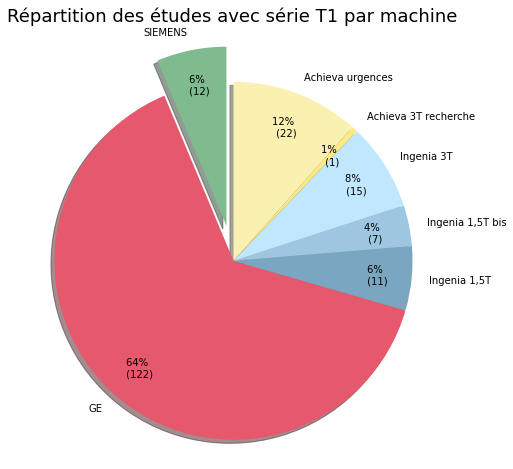

In [61]:
labels = nbT1_parmachine.index
labels_2 = ['SIEMENS', 'GE', 'Ingenia 1,5T', 'Ingenia 1,5T bis', 
            'Ingenia 3T', 'Achieva 3T recherche', 'Achieva urgences']
mycolors = ['#7fbb8f', '#e6586c', '#7aa6c2', '#9dc6e0', '#c1e7ff', '#fdea83', '#faf1b0']
explode = (0.2, 0, 0, 0, 0, 0, 0)
fig, ax = plt.subplots(figsize = (8,8))
ax.pie(nbT1_parmachine, labels=labels_2, explode = explode, 
       autopct=lambda p : '{:.0f}% \n ({:,.0f})'.format(p,p * sum(nbT1_parmachine)/100), 
       startangle=90, shadow = True, colors = mycolors, pctdistance = 0.8)
ax.axis('equal')
plt.title('Répartition des études avec série T1 par machine', fontsize=18)
plt.savefig('Répartition des séries T1 sans Gado par machine.jpg')
plt.show()

# Table des séries T1 avec Gado

In [52]:
table_T1Gado = [ma_table.loc[w] for w in ma_table.index if ('T1' in ma_table.loc[w,'SeriesDescription'] \
                                                        and ('Gado' in ma_table.loc[w,'SeriesDescription'] \
                                                        or 'GADO' in ma_table.loc[w,'SeriesDescription'] \
                                                        or 'gd' in ma_table.loc[w,'SeriesDescription'] \
                                                        or 'GD' in ma_table.loc[w,'SeriesDescription']))]
df_table_T1Gado = pd.DataFrame(table_T1Gado)

Nombre d'études avec série T1 Gado par machine

In [53]:
nbT1Gado_parmachine = df_table_T1Gado.groupby('Station Name')['StudyInstanceUID'].nunique()
nbT1Gado_parmachine

Station Name
AWP41694            12
MR02               118
PHILIPS-2RTT9SD      3
PHILIPS-SM5K4H7      1
SLGACHIEVA           1
SLGIRM3T01           1
SLGURGIRM01         12
Name: StudyInstanceUID, dtype: int64

In [146]:
sum(nbT1Gado_parmachine)

148

Représentation graphique de la répartition des études avec T1 Gado par machine

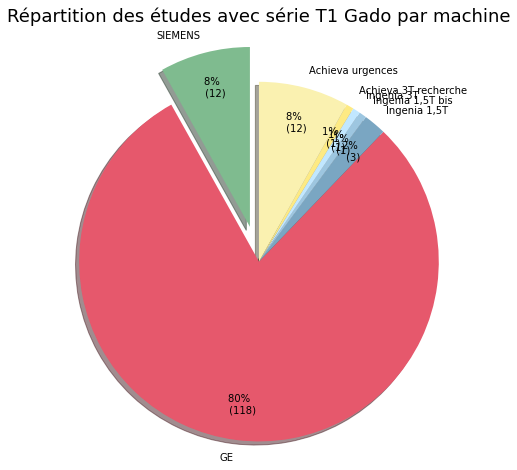

In [54]:
labels = nbT1Gado_parmachine.index
labels_2 = ['SIEMENS', 'GE', 'Ingenia 1,5T', 'Ingenia 1,5T bis', 
            'Ingenia 3T', 'Achieva 3T recherche', 'Achieva urgences']
mycolors = ['#7fbb8f', '#e6586c', '#7aa6c2', '#9dc6e0', '#c1e7ff', '#fdea83', '#faf1b0']
explode = (0.2, 0, 0, 0, 0, 0, 0)
fig, ax = plt.subplots(figsize = (8,8))
ax.pie(nbT1Gado_parmachine, labels=labels_2, explode = explode, 
       autopct=lambda p : '{:.0f}% \n ({:,.0f})'.format(p,p * sum(nbT1Gado_parmachine)/100), 
       startangle=90, shadow = True, colors = mycolors, pctdistance = 0.8)
ax.axis('equal')
plt.title('Répartition des études avec série T1 Gado par machine', fontsize=18)
plt.savefig('Répartition des séries T1 avec Gado par machine.jpg')
plt.show()

# Table des Séries T2

In [55]:
table_T2 = [ma_table.loc[w] for w in ma_table.index if ('T2' in ma_table.loc[w,'SeriesDescription'] \
                                                        and '*' not in ma_table.loc[w,'SeriesDescription'] \
                                                        and 'ETOILE' not in ma_table.loc[w,'SeriesDescription']\
                                                        and 'FLAIR' not in ma_table.loc[w,'SeriesDescription'])]
df_table_T2 = pd.DataFrame(table_T2)

Nombre d'études avec série T2 par machine

In [56]:
nbT2_parmachine = df_table_T2.groupby('Station Name')['StudyInstanceUID'].nunique()
nbT2_parmachine

Station Name
AWP41694           11
MR02               37
PHILIPS-2RTT9SD     3
PHILIPS-SM5K4H7     3
SLGACHIEVA         12
SLGIRM3T01          1
SLGURGIRM01         3
Name: StudyInstanceUID, dtype: int64

In [149]:
sum(nbT2_parmachine)

70

Représentation graphique de la répartition des études avec T2 par machine

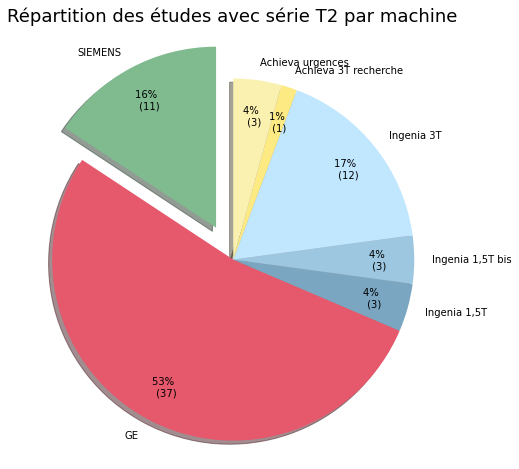

In [57]:
labels = nbT2_parmachine.index
labels_2 = ['SIEMENS', 'GE', 'Ingenia 1,5T', 'Ingenia 1,5T bis', 
            'Ingenia 3T', 'Achieva 3T recherche', 'Achieva urgences']
mycolors = ['#7fbb8f', '#e6586c', '#7aa6c2', '#9dc6e0', '#c1e7ff', '#fdea83', '#faf1b0']
explode = (0.2, 0, 0, 0, 0, 0, 0)
fig, ax = plt.subplots(figsize = (8,8))
ax.pie(nbT2_parmachine, labels=labels_2, explode = explode, 
       autopct=lambda p : '{:.0f}% \n ({:,.0f})'.format(p,p * sum(nbT2_parmachine)/100), 
       startangle=90, shadow = True , colors = mycolors, pctdistance = 0.8)
ax.axis('equal')
plt.title('Répartition des études avec série T2 par machine', fontsize=18)
plt.savefig('Répartition des séries T2 par machine.jpg')
plt.show()

# Table des Séries FLAIR

In [58]:
table_FLAIR = [ma_table.loc[w] for w in ma_table.index if ('FLAIR ' in ma_table.loc[w,'SeriesDescription'])]
df_table_FLAIR = pd.DataFrame(table_FLAIR)

Nombre d'études avec série FLAIR par machine

In [59]:
nbFLAIR_parmachine = df_table_FLAIR.groupby('Station Name')['StudyInstanceUID'].nunique()
nbFLAIR_parmachine

Station Name
AWP41694            12
MR02               137
PHILIPS-2RTT9SD     10
PHILIPS-SM5K4H7      7
SLGACHIEVA           6
SLGURGIRM01         16
Name: StudyInstanceUID, dtype: int64

In [152]:
sum(nbFLAIR_parmachine)

188

Représentation graphique de la répartition des études avec FLAIR par machine

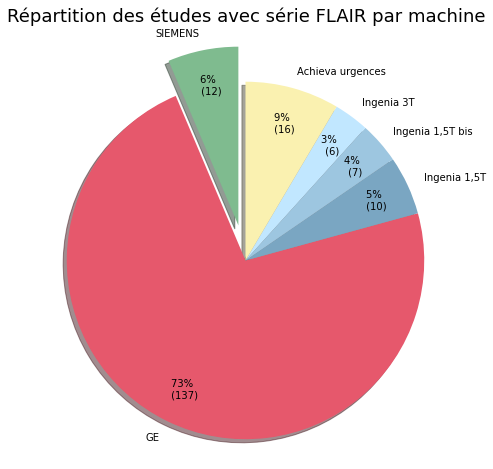

In [60]:
labels_2 = ['SIEMENS', 'GE', 'Ingenia 1,5T', 'Ingenia 1,5T bis', 
            'Ingenia 3T', 'Achieva urgences']
mycolors = ['#7fbb8f', '#e6586c', '#7aa6c2', '#9dc6e0', '#c1e7ff', '#faf1b0']
explode = (0.2, 0, 0, 0, 0, 0)
fig, ax = plt.subplots(figsize = (8,8))
ax.pie(nbFLAIR_parmachine, labels=labels_2, explode = explode, 
       autopct=lambda p : '{:.0f}% \n ({:,.0f})'.format(p,p * sum(nbFLAIR_parmachine)/100), 
       startangle=90, shadow = True, colors = mycolors, pctdistance = 0.8)
ax.axis('equal')
plt.title('Répartition des études avec série FLAIR par machine', fontsize=18)
plt.savefig('Répartition des séries FLAIR par machine.jpg')
plt.show()

nrun = 1;%X; % enter the number of runs here
jobfile = {'/NAS/dumbo/protocoles/HAMSI/code/CAT12_job.m'};
jobs = repmat(jobfile, 1, nrun);
inputs = cell(0, nrun);
for crun = 1:nrun
end
spm('defaults', 'FMRI');
spm_jobman('run', jobs, inputs{:});

# Constructions de la table contenant les 3D T1 sans gado et faites sur la GE

In [42]:
table_T1_2 = [ma_table.loc[w] for w in ma_table.index if ('Sag CUBE T1 ' == ma_table.loc[w,'SeriesDescription'])] 
df_table_T1_2 = pd.DataFrame(table_T1_2)

table_T1_GE = [df_table_T1_2.loc[w] for w in df_table_T1_2.index if (('MR02' in df_table_T1_2.loc[w,'Station Name']))]
df_table_T1_GE = pd.DataFrame(table_T1_GE)

97

Création du fichier csv des séries T1 sans Gado sur la GE

In [103]:
df_table_T1_GE.to_csv(os.path.join(PATH_DIR,'df_table_T1_GE.csv'))

# Constructions de la table contenant les T1 avec Gado et faites sur la GE

In [29]:
table_T1Gado_2 = [df_table_T1Gado.loc[w] for w in df_table_T1Gado.index if (df_table_T1Gado.loc[w,'SeriesDescription']=='Sag CUBE T1 Gado')]
df_table_T1Gado_2 = pd.DataFrame(table_T1Gado_2)

table_T1Gado_GE = df_table_T1Gado_2[df_table_T1Gado_2['Station Name'] == 'MR02']
df_table_T1Gado_GE = pd.DataFrame(table_T1Gado_GE)
len(df_table_T1Gado_GE)

107

Création du fichier csv des séries T1 avec Gado sur la GE

In [105]:
df_table_T1Gado_GE.to_csv(os.path.join(PATH_DIR,'df_table_T1Gado_GE.csv'))

# Constructions de la table contenant les FLAIR  et faites sur la GE

In [30]:
table_FLAIR_GE = [df_table_FLAIR.loc[w] for w in df_table_FLAIR.index if (('Sag' in df_table_FLAIR.loc[w,'SeriesDescription']) and (df_table_FLAIR.loc[w,'Station Name']=='MR02'))]
df_table_FLAIR_GE = pd.DataFrame(table_FLAIR_GE)

128

Création du fichier csv des séries FLAIR sur la GE

In [32]:
df_table_FLAIR_GE.to_csv(os.path.join(PATH_DIR,'df_table_FLAIR_GE.csv'))

In [21]:
df_table_FLAIR_GE.to_csv(os.path.join(PATH_DIR,'df_table_FLAIR_GE_2.csv'))
# table FLAIR avec ajout de colonnes d'informations sur les séries : TE, TR, verion du logiciel, taille de la matrice

Informations sur les séries

In [18]:
table_FLAIR_GE_infos = df_table_FLAIR_GE[{'PatientID','StudyInstanceUID','SerieInstanceUID','StudyDate'}]
df_table_FLAIR_GE_infos = pd.DataFrame(table_FLAIR_GE_infos)

Repetition_Time = []
Echo_Time = []
Acquisition_Matrix = []
Software_Versions = []

for x in df_table_FLAIR_GE_infos.index : 
    serie = glob.glob(join(mypath,df_table_FLAIR_GE_infos.loc[x,'StudyInstanceUID'],df_table_FLAIR_GE_infos.loc[x,'SerieInstanceUID'],"MR*"),recursive = True)
    ds=dcm.dcmread(serie[0])
    Repetition_Time.append(ds.RepetitionTime)
    Echo_Time.append(ds.EchoTime)
    Acquisition_Matrix.append(ds.AcquisitionMatrix)
    Software_Versions.append(ds.SoftwareVersions)
        
df_table_FLAIR_GE_infos['Software_Versions'] = Software_Versions
df_table_FLAIR_GE_infos['Acquisition_Matrix'] = Acquisition_Matrix
df_table_FLAIR_GE_infos['Repetition_Time'] = Repetition_Time
df_table_FLAIR_GE_infos['Echo_Time'] = Echo_Time

In [195]:
df_table_FLAIR_GE_infos.groupby('Repetition_Time')['SerieInstanceUID'].nunique()

Repetition_Time
6000.0     11
6500.0      1
6800.0    116
Name: SerieInstanceUID, dtype: int64

Ajout d'une colonne Repetition Time à la table des FLAIR sur la GE

In [19]:
df_table_FLAIR_GE['Repetition_Time'] = Repetition_Time

# On rassemble les tables T1 et FLAIR sur GE

In [127]:
T1_FLAIR_GE = df_table_T1_GE.merge(df_table_FLAIR_GE,left_on='StudyInstanceUID',right_on='StudyInstanceUID',suffixes=('_T1', '_FLAIR'))
len(T1_FLAIR_GE)

91

Création du fichier csv des études avec un T1 et un FLAIR sur la GE

In [34]:
T1_FLAIR_GE.to_csv(os.path.join(PATH_DIR,'T1_FLAIR_GE.csv'))

# On rassemble les tables T1Gado et FLAIR sur GE

In [128]:
T1Gado_FLAIR_GE = df_table_T1Gado_GE.merge(df_table_FLAIR_GE,left_on='StudyInstanceUID',right_on='StudyInstanceUID',suffixes=('_T1', '_FLAIR'))
len(T1Gado_FLAIR_GE)

98

Création du fichier csv des études avec un T1 Gado et un FLAIR sur la GE

In [112]:
T1Gado_FLAIR_GE.to_csv(os.path.join(PATH_DIR,'T1Gado_FLAIR_GE.csv'))

# Attribution des scores

In [31]:
liste_score = []
for x in ma_table['StudyInstanceUID'] : 
    score = 0
    score_T1 = df_table_T1_GE[df_table_T1_GE["StudyInstanceUID"].str.contains(x) == True]
    if len(score_T1) >= 1 :
        score += 100
    score_T1Gado = df_table_T1Gado_GE[df_table_T1Gado_GE["StudyInstanceUID"].str.contains(x) == True]
    if len(score_T1Gado) >= 1 :
        score += 10
    score_FLAIR = df_table_FLAIR_GE[df_table_FLAIR_GE["StudyInstanceUID"].str.contains(x) == True]
    if len(score_FLAIR) >= 1 :
        score += 1  
    liste_score.append(score)

Ajout des scores à ma_table

In [32]:
ma_table['Score'] = liste_score

Création d'un dataframe des scores avec StudyInstanceUID unique

In [34]:
score_series = ma_table[{'PatientID', 'PatientName', 'PatientBirthDate', 'PatientSex', 'AccessionNumber', 'StudyDate', 'StudyTime', 'StudyInstanceUID', 'Station Name', 'Score'}]
score_series = score_series.reindex(columns = ['PatientID', 'PatientName', 'PatientBirthDate', 'PatientSex', 'AccessionNumber', 'StudyDate', 'StudyTime', 'StudyInstanceUID', 'Station Name', 'Score'])
df_score = pd.DataFrame(score_series)
df_score.drop_duplicates(subset ="StudyInstanceUID", keep = 'first', inplace=True)

In [175]:
repart_scores = ma_table.groupby('Score')['StudyInstanceUID'].nunique()
print(repart_scores)

Score
0      71
1      29
10      3
11      9
101     6
110     7
111    83
Name: StudyInstanceUID, dtype: int64


# Essais

In [50]:
#ma_table = ma_table.sort_values('StudyInstanceUID')

In [217]:
# Affichage de la totalité des lignes du dataframe
#pd.set_option('display.max_rows', None)

In [60]:
ma_table[{'SeriesDescription','PatientID'}]

,SeriesDescription,PatientID
1643,LOCA HASTE CERVICAL,500061953
1645,SAG T2 3D SPACE,500061953
1644,PhoenixZIPReport,500061953
2439,T1 SE AXIAL,102887393
2441,DIFF_RESOLVE 5MM_ADC,102887393
...,...,...
2312,Sag CUBE T1,96301
2313,Ax Diffusion b1000,96301
2314,Cal Head 24,96301
2315,Ax T2* GRE FFE,96301


In [54]:
for f in ma_table[{'SeriesDescription','PatientID'}]:
    print(f)

SeriesDescription
PatientID


In [393]:
#onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
#onlyfiles = [f.loc[f.index,'PatientID'] for f in ma_table[{'SeriesDescription','PatientID'}] if 'T1' in f.loc['SeriesDescription']]   
onlyfiles

AttributeError: 'str' object has no attribute 'loc'

In [127]:
onlyfiles = [f for f in ma_table['SeriesDescription'] if 'T1' in f]
len(onlyfiles)

555

In [224]:
#ma_table.loc[ma_table['SeriesDescription']=='rfmt'or ma_table['SeriesDescription']=='RFMT'or ma_table['SeriesDescription']=='RFT' ]
#ma_table['SeriesDescription']=='rfmt' # ma_table['SeriesDescription']=='RMFT'

In [104]:
len(set(ma_table['StudyInstanceUID']))

208

In [37]:
# essais 
serie = glob.glob(join(mypath,ma_table.loc[13,'StudyInstanceUID'],ma_table.loc[13,'SerieInstanceUID'],"*"),recursive = True)
ds = dcm.dcmread(serie[0])
ds

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 216
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.113619.2.374.2807.1582298.13984.1638181039.209
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.4
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_364'
(0002, 0016) Source Application Entity Title     AE: 'CHRUL_QRP'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'OTHER']
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.840.113619.2.374.2807.158

In [ ]:
#table_T1_GE=df_table_T1_2.set_index(['PatientID'])
#table_FLAIR_GE=df_table_FLAIR_2.set_index(['PatientID'])
#T1_FLAIR_GE=df_table_T1_2.join(df_table_FLAIR_2,how='left',on='PatientID',lsuffix='T1',rsuffix='FLAIR')
#T1_FLAIR_GE.to_csv(os.path.join(PATH_DIR,'T1_FLAIR_GE.csv'))
T1_FLAIR_GE = df_table_T1_GE.merge(df_table_FLAIR_GE,left_on='StudyInstanceUID',right_on='StudyInstanceUID',suffixes=('_T1', '_FLAIR'))
len(T1_FLAIR_GE)

# Ici les fichiers dicoms (dcm)

In [5]:
FILE="/NAS/dumbo/protocoles/HAMSI/data/1.3.51.0.1.1.10.49.10.222.6731818.6732586/1.3.46.670589.50.167746771223637.6700.1623351958063/SC.1.3.46.670589.50.167746771223637.6700.1623352010063.4"
ds=dcm.dcmread(FILE)
ds

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 216
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.46.670589.50.167746771223637.6700.1623352010063.4
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.4
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_364'
(0002, 0016) Source Application Entity Title     AE: 'CHRUL_QRP'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['DERIVED', 'SECONDARY']
(0008, 0012) Instance Creation Date              DA: '20210610'
(0008, 0013) Instance Creation Time              TM: '190650.063000'
(0008, 0016) 

In [16]:
from os import listdir
from os.path import isfile, join
#onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [16]:
mypath = join('/NAS','dumbo','protocoles','HAMSI','data')
print(mypath)
#listdir(mypath)

/NAS/dumbo/protocoles/HAMSI/data


In [18]:
import glob
len(glob.glob(join(mypath,"*","*","MR*"),recursive=True))

412254